# Constructing a Work Plan for Interconnect's Customer Data

This Notebook is for performing Explanatory Data Analysis on the data provided from the company Interconnect. Once EDA is performed, a work plan will be formed explaning the steps that have been chosen to be executed based on the finding and the objective of the project.

***

## Imports and Uploads

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
#displaying datasets to observe
df_contract

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [4]:
df_personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [5]:
df_internet

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No


In [6]:
df_phone

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


<span style='color:blue'>
The first thing that is noticed is that all the datasets do not have the same nuber of rows. This can easily mean that not all customers are using the additional services.

I also noticed that most of the features here have binary responses (one answer or the other). If not that, then it's categorical. Only two features have true numerical values and those are the monthly and yearly charges in the contract dataset.

With that being said, after the basics, I will be looking at a few charts and ratios to get an idea of how balanced the values are.
</span>

## Explanatory Data Analysis

### Checking Missing Values and Duplicates

In [7]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [8]:
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [9]:
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [10]:
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

__Perfect. No missing values__

In [11]:
df_contract.duplicated().sum()

0

In [12]:
df_personal.duplicated().sum()

0

In [13]:
df_internet.duplicated().sum()

0

In [14]:
df_phone.duplicated().sum()

0

__No duplicated rows__

### Conversions

#### Contracts

In [15]:
#checking information about df
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [16]:
#converting begindate to datetime type
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')

In [17]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


<span style='color:red'>
I wonder if I can convert selected elements of the EndDate column to datetime while the Nos stay as strings
</span>

In [18]:
df_contract[df_contract['EndDate'] != 'No']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
13,0280-XJGEX,2015-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3
...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,2018-11-01,2019-11-01 00:00:00,One year,Yes,Electronic check,59.80,727.8
7026,8775-CEBBJ,2019-02-01,2019-11-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35
7032,6894-LFHLY,2019-10-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,75.75,75.75
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25


In [19]:
#setting the index of the above dataframe to variable
index_no = df_contract[df_contract['EndDate'] != 'No'].index

In [20]:
#converted selected elements with appropriate indices to datetime
df_contract.loc[index_no, 'EndDate'] = pd.to_datetime(df_contract.loc[index_no, 'EndDate'], format='%Y-%m-%d')

In [21]:
#testing if I can find a time difference
df_contract.loc[2, 'EndDate'] - df_contract.loc[2, 'BeginDate']

Timedelta('61 days 00:00:00')

<span style='color:blue'>

__Ok that was a success. So there needs be a solution for the "No" values in case I need to do operations with this column__
</span>

<span style='color:red'>
    
__Need to find out why total charges is an object type and not a float__
</span>

In [22]:
#seeing which elements are not floats
for i, value in enumerate(df_contract['TotalCharges']):
    try:
        float(value)
    except (ValueError, TypeError):
        print(f"Index {i}: '{value}' (type: {type(value)})")

Index 488: ' ' (type: <class 'str'>)
Index 753: ' ' (type: <class 'str'>)
Index 936: ' ' (type: <class 'str'>)
Index 1082: ' ' (type: <class 'str'>)
Index 1340: ' ' (type: <class 'str'>)
Index 3331: ' ' (type: <class 'str'>)
Index 3826: ' ' (type: <class 'str'>)
Index 4380: ' ' (type: <class 'str'>)
Index 5218: ' ' (type: <class 'str'>)
Index 6670: ' ' (type: <class 'str'>)
Index 6754: ' ' (type: <class 'str'>)


__Total charge values of a space string is kind of weird. Let's check if it corresponds to anything else in its dataset__

In [23]:
df_contract[df_contract['TotalCharges']==' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


The only feature that has all the same value is the begin date. Let's see if that's the reason by comparing it to the filtered dataframe of only 2020-02-01 dates

In [24]:
df_contract[df_contract['BeginDate']=='2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


By inspection they look the same. To be sure...

In [25]:
df_contract[df_contract['TotalCharges']==' '] == df_contract[df_contract['BeginDate']=='2020-02-01']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,True,True,True,True,True,True,True,True
753,True,True,True,True,True,True,True,True
936,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True
1340,True,True,True,True,True,True,True,True
3331,True,True,True,True,True,True,True,True
3826,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True
5218,True,True,True,True,True,True,True,True
6670,True,True,True,True,True,True,True,True


Ok great! they are the same. Now, knowing that the information was valid up until Feb 1st 2020, a conclusion I can draw is that the total charges have not been available yet since they are the newest clients. Will the total charges be a crutial feature for our model? I think they will. It's possible some clients may be upset with the total amount of oney they have been spending on the service, so that feature should be considered. The thought of removing these rows has crossed my mind. With that being said, this arises my first clarifying question. "Should we expect the newly subscribed clients to pay the first month's charge or is it possible they are on a free trial and can cancel before the month ends without paying?" If we can assume they will pay the frst month, Instead of removing the rows, we could either replace the strings with zero or equate it to the monthly charge.

In [26]:
#making sure there are no other weird inputs in the other columns
for y in df_contract.columns:
    print(df_contract[y].value_counts())
    print()

3413-BMNZE    1
3550-SAHFP    1
2608-BHKFN    1
5832-EXGTT    1
3898-GUYTS    1
             ..
8668-KNZTI    1
2952-QAYZF    1
2878-DHMIN    1
0168-XZKBB    1
9643-AVVWI    1
Name: customerID, Length: 7043, dtype: int64

2014-02-01    366
2019-10-01    237
2019-09-01    237
2019-11-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-12-01      3
2013-10-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

20.05     61
19.85     45
19.90     44
1

No more out of the ordinary values

#### Personal

In [27]:
for z in df_personal.columns:
    print(df_personal[z].value_counts())
    print()

3413-BMNZE    1
3550-SAHFP    1
2608-BHKFN    1
5832-EXGTT    1
3898-GUYTS    1
             ..
8668-KNZTI    1
2952-QAYZF    1
2878-DHMIN    1
0168-XZKBB    1
9643-AVVWI    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64



No out of the ordinary values

#### Internet

In [28]:
for x in df_internet.columns:
    print(df_internet[x].value_counts())
    print()

5038-ETMLM    1
7811-JIVPF    1
5701-GUXDC    1
6728-DKUCO    1
8597-CTXVJ    1
             ..
5404-GGUKR    1
9584-EXCDZ    1
8118-LSUEL    1
1862-SKORY    1
9643-AVVWI    1
Name: customerID, Length: 5517, dtype: int64

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64

No     3088
Yes    2429
Name: OnlineBackup, dtype: int64

No     3095
Yes    2422
Name: DeviceProtection, dtype: int64

No     3473
Yes    2044
Name: TechSupport, dtype: int64

No     2810
Yes    2707
Name: StreamingTV, dtype: int64

No     2785
Yes    2732
Name: StreamingMovies, dtype: int64



No out of the ordinary values

#### Phone

In [29]:
df_phone['MultipleLines'].value_counts()

No     3390
Yes    2971
Name: MultipleLines, dtype: int64

No out of ordinary values

# Charts

In [30]:
df_contract['MonthlyCharges'].nunique()

1585

That's a lot of different monthly charges. You would think certain packages would have a standard price.

<AxesSubplot:>

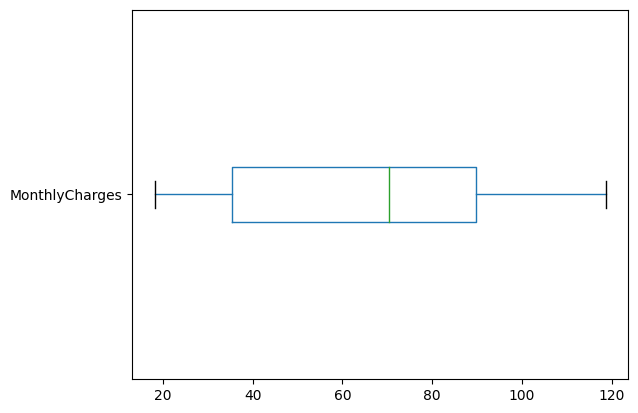

In [31]:
df_contract['MonthlyCharges'].plot(kind='box', vert=False)

In [32]:
df_contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

No outliers or anything here

<AxesSubplot:title={'center':'Monthly Charges'}, ylabel='Frequency'>

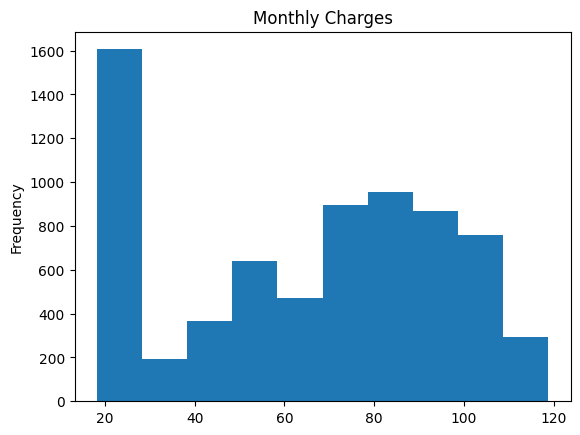

In [33]:
df_contract['MonthlyCharges'].plot(kind='hist', title='Monthly Charges', xlabel='Price', ylabel='Freq')

Most customers pay less than $30

## Clarifying Questions

__My official clarifying question is:__
Should we expect the newly subscribed clients to pay the first month's charge or is it possible they are on a free trial and can cancel before the month ends without paying?

## Work Plan

<span style='color:green'> __Step 1:__ </span> A new column will be created in the contract datafram that represents the target value.
The 'EndDate' column has two different types. To make it easier for the model, I will make a column that is simply a 1 or 0. 1 being yes they are still active and 0 being no they are not active.

<span style='color:green'> __Step 2:__ </span> The datasets will be concatinated into one dataframe. Since there are some customers that do not have every service, some values my become missing, however, that can be filled with a value that will be interpreted by the model as it being absent. Once all the features that are deemed necessary are established, the features, target, training sets, validation sets, and test sets can be created. 

<span style='color:green'> __Step 3:__ </span> There are a few features that are categorical, so they will be converted into numeric values to be interpreted by the models.

<span style='color:green'> __Step 4:__ </span> Since this is a binary classification situation, the models that will be trained and tested are DecisionTree, RandomForest, and LogisticRegression. If adjustments are needed like scaling, upsampling, etc., that will be done.

<span style='color:green'> __Step 5:__ </span> The models will be tested using a validation set and the AUC-ROC will be monitored. If the desired score is not achieved, then other models will be tested like K-nearest neighbhors